<a href="https://colab.research.google.com/github/kotharisanjana/CMPE255_DataMining_Fall2022/blob/main/Assignment2/Pycaret_MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [ ]:
!pip install pycaret --user
!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1
!pip install opendatasets
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.7 MB/s 
     |████████████████████████████████| 636 kB 39.2 MB/s 
     |████████████████████████████████| 2.0 MB 52.8 MB/s 
     |████████████████████████████████| 3.3 MB 37.2 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 88 kB 5.5 MB/s 
     |████████████████████████████████| 268 kB 45.5 MB/s 
     |████████████████████████████████| 6.8 MB 35.8 MB/s 
     |████████████████████████████████| 134 kB 48.7 MB/s 
     |████████████████████████████████| 1.3 MB 37.8 MB/s 
     |████████████████████████████████| 1.7 MB 37.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 55.2 MB/s 
     |████████████████████████████████| 2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 6.4 MB/s 
     |████████████████████████████████| 54 kB 4.2 MB/s 
     |████████████████████████████████| 84 kB 4.4 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 2.3 MB 27.0 MB/s 
     |████████████████████████████████| 270 kB 54.3 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 212 kB 72.5 MB/s 
     |████████████████████████████████| 112 kB 71.6 MB/s 
     |█████████████████████████████

## Kaggle API credentials

In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 83.6kB/s]


## Imports

In [ ]:
import opendatasets as od
import pandas as pd
from pycaret.classification import *
import pandas_profiling as pp 

## Download dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation')
od.download('https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation')

100%|██████████| 98.7k/98.7k [00:00<00:00, 33.7MB/s]


Skipping, found downloaded files in "./customer-segmentation" (use force=True to force download)


In [ ]:
train = pd.read_csv('/content/customer-segmentation/train.csv')
test = pd.read_csv('/content/customer-segmentation/test.csv')

## EDA and data transformation

In [ ]:
pp.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train.drop(['ID'], inplace = True, axis = 1)
test.drop(['ID'], inplace = True, axis = 1)

## Set up environment

In [ ]:
classification = setup(train, \
                       session_id = 1, \
                       target = 'Segmentation', \
                       categorical_imputation = 'mode', \
                       ordinal_features = {'Spending_Score' : ['Low', 'Average', 'High']}, \
                       numeric_features = ['Work_Experience', 'Family_Size'], \
                       numeric_imputation = 'median', \
                       feature_selection = True, \
                       fix_imbalance = True, \
                       ignore_low_variance = True, \
                       fold = 5, \
                       )

,Description,Value
0,session_id,1
1,Target,Segmentation
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3"
4,Original Data,"(8068, 10)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,True
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Work_Experience',
                                                          'Family_Size'],
                                      target='Segmentation',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fil...
                ('fix_perfect', Remove_100(target='Segmentation')),
                ('clean_names', Clean_Col

## Model Selection


In [ ]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5272,0.7889,0.5185,0.5211,0.5231,0.3673,0.3678,2.148
lightgbm,Light Gradient Boosting Machine,0.5178,0.7781,0.5090,0.5130,0.5145,0.3547,0.3551,0.628
ada,Ada Boost Classifier,0.5091,0.7520,0.5002,0.5058,0.5055,0.3435,0.3445,0.292
lr,Logistic Regression,0.5011,0.7571,0.4923,0.4955,0.4931,0.3330,0.3356,2.598
ridge,Ridge Classifier,0.4967,0.0000,0.4870,0.4921,0.4786,0.3267,0.3336,0.062
lda,Linear Discriminant Analysis,0.4900,0.7553,0.4830,0.4956,0.4854,0.3194,0.3229,0.076
rf,Random Forest Classifier,0.4856,0.7463,0.4773,0.4826,0.4836,0.3120,0.3122,0.972
qda,Quadratic Discriminant Analysis,0.4792,0.7356,0.4721,0.4794,0.4756,0.3047,0.3064,0.066
nb,Naive Bayes,0.4641,0.7284,0.4553,0.4619,0.4537,0.2840,0.2883,0.064
et,Extra Trees Classifier,0.4633,0.7145,0.4554,0.4624,0.4625,0.2826,0.2827,0.964


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## Model creation

In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5283,0.7792,0.5191,0.5237,0.5252,0.3688,0.3692
1,0.5124,0.7780,0.5039,0.5091,0.5098,0.3476,0.3480
2,0.5093,0.7844,0.5012,0.5050,0.5068,0.3437,0.3439
3,0.5190,0.7744,0.5097,0.5137,0.5155,0.3565,0.3569
4,0.5199,0.7745,0.5110,0.5137,0.5150,0.3568,0.3577
Mean,0.5178,0.7781,0.5090,0.5130,0.5145,0.3547,0.3551
Std,0.0066,0.0037,0.0062,0.0062,0.0063,0.0087,0.0088


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5195,0.7873,0.5099,0.5109,0.5140,0.3566,0.3571
1,0.5372,0.7944,0.5291,0.5337,0.5336,0.3809,0.3819
2,0.5226,0.7984,0.5138,0.5157,0.5184,0.3615,0.3618
3,0.5297,0.7798,0.5208,0.5237,0.5258,0.3706,0.3710
4,0.5270,0.7847,0.5190,0.5215,0.5235,0.3670,0.3674
Mean,0.5272,0.7889,0.5185,0.5211,0.5231,0.3673,0.3678
Std,0.0061,0.0067,0.0066,0.0077,0.0067,0.0083,0.0085


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5080,0.7465,0.4982,0.5028,0.5032,0.3412,0.3423
1,0.5062,0.7600,0.4983,0.5059,0.5033,0.3400,0.3415
2,0.5093,0.7617,0.5003,0.5053,0.5056,0.3440,0.3449
3,0.5022,0.7438,0.4925,0.4982,0.4987,0.3346,0.3354
4,0.5199,0.7478,0.5115,0.5166,0.5167,0.3576,0.3584
Mean,0.5091,0.7520,0.5002,0.5058,0.5055,0.3435,0.3445
Std,0.0059,0.0074,0.0062,0.0060,0.0060,0.0077,0.0076


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)
INFO:logs:create_model() succesfully completed......................................


## Model tuning

In [ ]:
tuned_lgbm = tune_model(lgbm, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5186,0.7844,0.5087,0.5102,0.5130,0.3558,0.3565
1,0.5451,0.7929,0.5375,0.5451,0.5428,0.3920,0.3934
2,0.5279,0.7957,0.5194,0.5252,0.5253,0.3686,0.3693
3,0.5182,0.7779,0.5091,0.5160,0.5154,0.3554,0.3564
4,0.5244,0.7797,0.5161,0.5206,0.5215,0.3637,0.3641
Mean,0.5268,0.7861,0.5182,0.5234,0.5236,0.3671,0.3679
Std,0.0099,0.0071,0.0105,0.0119,0.0106,0.0134,0.0136


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=56, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=260, n_jobs=-1, num_leaves=50, objective=None,
               random_state=1, reg_alpha=0.1, reg_lambda=1e-06, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


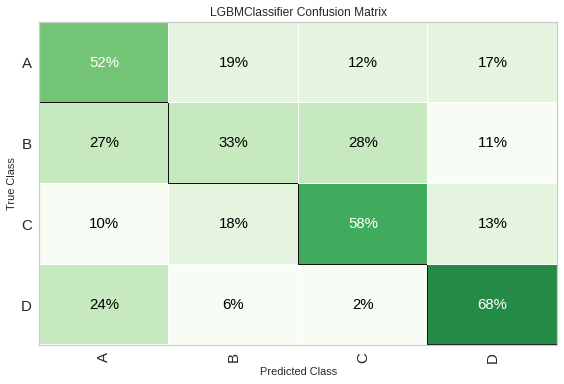

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

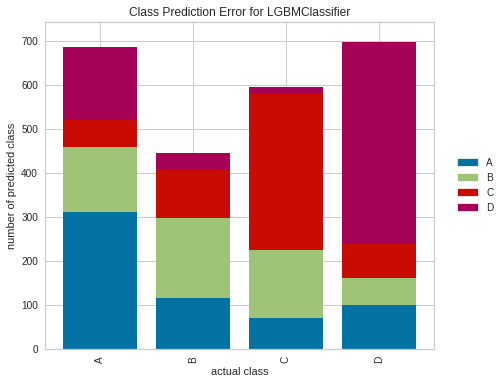

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot = 'error')

In [ ]:
tuned_gbc = tune_model(gbc, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5274,0.7896,0.5165,0.5156,0.5195,0.3668,0.3679
1,0.5425,0.7923,0.5357,0.5418,0.5407,0.3881,0.3889
2,0.5226,0.7968,0.5141,0.5182,0.5201,0.3615,0.3617
3,0.5368,0.7819,0.5279,0.5315,0.5332,0.3800,0.3805
4,0.5332,0.7854,0.5246,0.5273,0.5293,0.3752,0.3756
Mean,0.5325,0.7892,0.5237,0.5269,0.5285,0.3743,0.3749
Std,0.0070,0.0052,0.0078,0.0094,0.0080,0.0094,0.0095


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


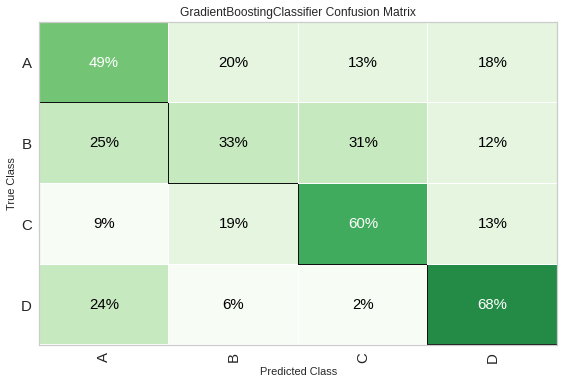

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_gbc, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

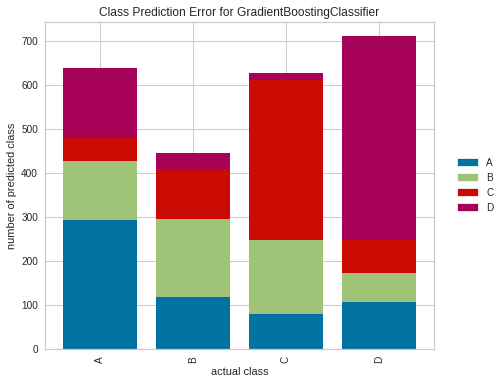

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_gbc, plot = 'error')

## Ensemble

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4575,0.6473,0.4511,0.4614,0.4593,0.2758,0.2759
1,0.4204,0.6203,0.4133,0.4248,0.4221,0.2261,0.2263
2,0.4172,0.6196,0.4106,0.4198,0.4184,0.2220,0.2220
3,0.4376,0.6312,0.4321,0.4419,0.4391,0.2497,0.2499
4,0.4367,0.6295,0.4292,0.4357,0.4362,0.2474,0.2474
Mean,0.4339,0.6296,0.4273,0.4367,0.4350,0.2442,0.2443
Std,0.0144,0.0100,0.0146,0.0146,0.0145,0.0193,0.0193


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4965,0.7317,0.4876,0.4943,0.4950,0.3267,0.3269
1,0.4566,0.7122,0.4505,0.4644,0.4593,0.2746,0.2751
2,0.4526,0.7196,0.4474,0.4617,0.4560,0.2697,0.2702
3,0.4721,0.7209,0.4661,0.4787,0.4749,0.2955,0.2957
4,0.4650,0.7195,0.4575,0.4666,0.4646,0.2852,0.2857
Mean,0.4686,0.7208,0.4618,0.4731,0.4700,0.2903,0.2907
Std,0.0155,0.0063,0.0144,0.0121,0.0141,0.0202,0.0201


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4690,0.7153,0.4605,0.4664,0.4675,0.2901,0.2902
1,0.4478,0.6837,0.4415,0.4520,0.4495,0.2627,0.2628
2,0.4420,0.6915,0.4343,0.4430,0.4423,0.2545,0.2546
3,0.4526,0.6883,0.4467,0.4564,0.4543,0.2692,0.2693
4,0.4597,0.7053,0.4532,0.4593,0.4593,0.2780,0.2781
Mean,0.4542,0.6968,0.4473,0.4554,0.4546,0.2709,0.2710
Std,0.0094,0.0117,0.0091,0.0078,0.0086,0.0123,0.0123


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fract

In [ ]:
blend_hard = blend_models(estimator_list = [lgbm, gbc, ada], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5248,0.0,0.5152,0.5190,0.5207,0.3639,0.3645
1,0.5398,0.0,0.5317,0.5382,0.5350,0.3844,0.3866
2,0.5199,0.0,0.5115,0.5152,0.5164,0.3579,0.3585
3,0.5244,0.0,0.5147,0.5205,0.5199,0.3634,0.3648
4,0.5288,0.0,0.5205,0.5258,0.5255,0.3692,0.3700
Mean,0.5275,0.0,0.5187,0.5237,0.5235,0.3678,0.3689
Std,0.0068,0.0,0.0071,0.0080,0.0064,0.0091,0.0096


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=1, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='

## Prediction on test set


In [ ]:
predict_model(blend_hard, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=1, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                    

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Label
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,A
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,C
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,B
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,C
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,D
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,A
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,B


## Gradio

In [ ]:
create_app(blend_hard)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare              1.0   
1     Female          Yes   38       Yes       Engineer              NaN   
2     Female          Yes   67       Yes       Engineer              1.0   
3       Male          Yes   67       Yes         Lawyer              0.0   
4     Female          Yes   40       Yes  Entertainment              NaN   
...      ...          ...  ...       ...            ...              ...   
8063    Male           No   22        No            NaN              0.0   
8064    Male           No   35        No      Executive              3.0   
8065  Female           No   33       Yes     Healthcare              1.0   
8066  Female           No   27       Yes     Healthcare              1.0   
8067    Male

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://14401.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fd40df6bd10>,
 'http://127.0.0.1:7860/',
 'https://14401.gradio.app')